# Małpia układanka

In [14]:
def rozwiaz(klocki):    
    klocek_k = ['k', 'k', 'k', 'k']
    print("--------------------------------------------------------------------------------------")
    print()
    print("Kolory w nawiasach oznaczają kolory ze schematu wyżej.")
    print()
    print("Program w obecnej wersji działa tylko dla układanek o parzystej liczbie klocków.")
    print()
    print("--------------------------------------------------------------------------------------")
    wymiar = sqrt(len(klocki))

    lp = MixedIntegerLinearProgram()
    x = lp.new_variable(binary=True) 

    #x[numer kwadratu(0-35), i, j, obrót]
    
    #jeden klocek w jednym miejscu
    print("Warunki podstawowe") 
    for i in range(wymiar):
        for j in range(wymiar):
            lp.add_constraint(sum([x[k, i, j, o] for k in range(len(klocki)) for o in range(4)]) == 1)

    #każdy klocek występuje tylko raz
    for k in range(len(klocki)):
        lp.add_constraint(sum([x[k, i, j, o] for i in range(wymiar) for j in range(wymiar) for o in range(4)]) == 1)
    show(lp)
    print()
    print("Dopasowanie koloru krawędzi")
    
    #warunek  na krawędzie zewnętrzne po kolumnach
    tmpk = []
    for i in range(wymiar):
        for j in range(0,wymiar,wymiar - 1):
            for k in range(len(klocki)):
                for o in range(4):
                    if j == 0:
                        if klocek_k[1] != obrot(klocki[k], o)[3]:
                            tmpk.append(x[k, i, j, o])
                    elif j == wymiar - 1 :
                        if obrot(klocki[k], o)[1] != klocek_k[3]:
                            tmpk.append(x[k, i, j, o])




    #warunek  na krawędzie zewnętrzne po wierszach
    for j in range(wymiar):
        for i in range(0,wymiar,wymiar - 1):
            for k in range(len(klocki)):
                for o in range(4):
                    if i == 0:
                        if klocek_k[2] != obrot(klocki[k], o)[0]:
                            tmpk.append(x[k, i, j, o])
                    elif i == wymiar - 1:
                        if obrot(klocki[k], o)[2] != klocek_k[0]:
                            tmpk.append(x[k, i, j, o])
    lp.add_constraint( sum(tmpk) == 0)

    show(lp)

    print()
    print("Porównywanie ścian-środek (kolor fioletowy)")     
    for i in range(1,wymiar-1,2):
        for j in range(1,wymiar-1,2):
            for k in range(len(klocki)):
                for o in range(4):
                    if obrot(klocki[k], o)[0] != 'k' and obrot(klocki[k], o)[1] != 'k' and obrot(klocki[k], o)[2] != 'k' and obrot(klocki[k], o)[3] != 'k':
                        test = []
                        for k2 in range(len(klocki)):
                            for o2 in range(4):
                                if k != k2:
                                    if obrot(klocki[k], o)[1] != obrot(klocki[k2], o2)[3]:
                                        test.append(x[k2, i, j+1, o2])
                                    if obrot(klocki[k], o)[2] != obrot(klocki[k2], o2)[0]:
                                        test.append(x[k2, i+1, j, o2])
                                    if obrot(klocki[k], o)[3] != obrot(klocki[k2], o2)[1]:
                                        test.append(x[k2, i, j-1, o2])
                                    if obrot(klocki[k], o)[0] != obrot(klocki[k2], o2)[2]:
                                        test.append(x[k2, i-1, j, o2])   
                        lp.add_constraint(4*x[k,i,j,o]+sum(test)<=4) 
                        
    for i in range(2,wymiar-1,2):
        for j in range(2,wymiar-1,2):
            for k in range(len(klocki)):
                for o in range(4):
                    if obrot(klocki[k], o)[0] != 'k' and obrot(klocki[k], o)[1] != 'k' and obrot(klocki[k], o)[2] != 'k' and obrot(klocki[k], o)[3] != 'k':
                        test = []
                        for k2 in range(len(klocki)):
                            for o2 in range(4):
                                if k != k2:
                                    if obrot(klocki[k], o)[1] != obrot(klocki[k2], o2)[3]:
                                        test.append(x[k2, i, j+1, o2])
                                    if obrot(klocki[k], o)[2] != obrot(klocki[k2], o2)[0]:
                                        test.append(x[k2, i+1, j, o2])
                                    if obrot(klocki[k], o)[3] != obrot(klocki[k2], o2)[1]:
                                        test.append(x[k2, i, j-1, o2])
                                    if obrot(klocki[k], o)[0] != obrot(klocki[k2], o2)[2]:
                                        test.append(x[k2, i-1, j, o2])   
                        lp.add_constraint(4*x[k,i,j,o]+sum(test)<=4) 
                        
    show(lp) 
    
    print()
    print("Porównywanie ostatnia kolumna (kolor zielony)")   
    for i in range(1,wymiar-1,2):
        for k in range(len(klocki)):
            for o in range(4):
                if obrot(klocki[k], o)[1]  == 'k' and obrot(klocki[k], o)[0] != 'k' and obrot(klocki[k], o)[2] != 'k' and obrot(klocki[k], o)[3] != 'k':
                    lista=[]
                    for k2 in range(len(klocki)):
                        for o2 in range(4):
                            if obrot(klocki[k], o)[2] != obrot(klocki[k2], o2)[0]:                        
                                lista.append(x[k2, i+1, wymiar-1, o2])
                            if obrot(klocki[k], o)[0] != obrot(klocki[k2], o2)[2]:                        
                                lista.append(x[k2, i-1, wymiar-1, o2])
                            if obrot(klocki[k], o)[3] != obrot(klocki[k2], o2)[1]:                        
                                lista.append(x[k2, i, wymiar-2, o2])                          
                    lp.add_constraint(3*x[k,i,wymiar-1,o]+sum(lista)<=3)  

    show(lp)

    print()
    print("Porównywanie ostatni rząd (kolor czerwony)") 
    for j in range(1,wymiar-1,2):
        for k in range(len(klocki)):
            for o in range(4): 
                if obrot(klocki[k], o)[2]  == 'k' and obrot(klocki[k], o)[0] != 'k' and obrot(klocki[k], o)[1] != 'k' and obrot(klocki[k], o)[3] != 'k' :
                    lista=[]
                    for k2 in range(len(klocki)):
                        for o2 in range(4):
                            if obrot(klocki[k], o)[1] != obrot(klocki[k2], o2)[3]:
                                lista.append(x[k2, wymiar-1, j+1, o2])
                            if obrot(klocki[k], o)[3] != obrot(klocki[k2], o2)[1]:
                                lista.append(x[k2, wymiar-1, j-1, o2])
                            if obrot(klocki[k], o)[0] != obrot(klocki[k2], o2)[2]:
                                lista.append(x[k2, wymiar-2, j, o2])                          
                    lp.add_constraint(3*x[k,wymiar-1,j,o]+sum(lista)<=3)            

    show(lp)

    print()
    print("Porównywanie pierwsza kolumna (kolor brązowy)")   
    for i in range(2,wymiar-1,2):
        for k in range(len(klocki)):
            for o in range(4):
                if obrot(klocki[k], o)[3] == 'k' and obrot(klocki[k], o)[0] != 'k' and obrot(klocki[k], o)[1] != 'k' and obrot(klocki[k], o)[2] != 'k':
                    lista=[]
                    for k2 in range(len(klocki)):
                        for o2 in range(4):
                            if obrot(klocki[k], o)[2] != obrot(klocki[k2], o2)[0]:                        
                                lista.append(x[k2, i+1, 0, o2])
                            if obrot(klocki[k], o)[0] != obrot(klocki[k2], o2)[2]:                        
                                lista.append(x[k2, i-1, 0, o2])
                            if obrot(klocki[k], o)[1] != obrot(klocki[k2], o2)[3]:                        
                                lista.append(x[k2, i, 1, o2])                          
                    lp.add_constraint(3*x[k,i,0,o]+sum(lista)<=3)  

    show(lp)
    print()
    print("Porównywanie pierwszy rząd (kolor pomarańczowy)") 
    for j in range(2,wymiar-1,2):
        for k in range(len(klocki)):
            for o in range(4):
                if obrot(klocki[k], o)[0] == 'k' and obrot(klocki[k], o)[1] != 'k' and obrot(klocki[k], o)[2] != 'k' and obrot(klocki[k], o)[3] != 'k':
                    lista=[]
                    for k2 in range(len(klocki)):
                        for o2 in range(4):
                            if obrot(klocki[k], o)[1] != obrot(klocki[k2], o2)[3]:
                                lista.append(x[k2, 0, j+1, o2])
                            if obrot(klocki[k], o)[3] != obrot(klocki[k2], o2)[1]:
                                lista.append(x[k2, 0, j-1, o2])
                            if obrot(klocki[k], o)[2] != obrot(klocki[k2], o2)[0]:
                                lista.append(x[k2, 1, j, o2])                          
                    lp.add_constraint(3*x[k,0,j,o]+sum(lista)<=3)            

    show(lp)
    print()
    print("Góra-lewo (kolor niebieski)")
    for k in range(len(klocki)):
            for o in range(4):
                if obrot(klocki[k], o)[0] == 'k' and obrot(klocki[k], o)[3] == 'k':
                    lista=[]
                    for k2 in range(len(klocki)):
                        for o2 in range(4):
                            if obrot(klocki[k], o)[1] != obrot(klocki[k2], o2)[3]:
                                lista.append(x[k2, 0, 1, o2])
                            if obrot(klocki[k], o)[2] != obrot(klocki[k2], o2)[0]:
                                lista.append(x[k2, 1, 0, o2])
                    lp.add_constraint(2*x[k,0,0,o]+sum(lista)<=2)        
    show(lp)
    
    print()
    print("Dół-prawo (kolor różowy)")
    for k in range(len(klocki)):
            for o in range(4):
                if obrot(klocki[k], o)[1]  == 'k' and obrot(klocki[k], o)[2]  == 'k':
                    lista=[]
                    for k2 in range(len(klocki)):
                        for o2 in range(4):
                            if obrot(klocki[k], o)[3] != obrot(klocki[k2], o2)[1]:
                                lista.append(x[k2, wymiar-1, wymiar-2, o2])
                            if obrot(klocki[k], o)[0] != obrot(klocki[k2], o2)[2]:
                                lista.append(x[k2, wymiar-2, wymiar-1, o2])
                    lp.add_constraint(2*x[k,wymiar-1,wymiar-1,o]+sum(lista)<=2)
    show(lp) 

    print()
    print("--------------------------------------------------------------------------------------")

    lp.solve()
    wynik = lp.get_values(x)

    wynik_klocki = []

    for key, value in wynik.items():
        if value == 1:
            wynik_klocki.append(key)
    
    #przrobienie wyniku na format odpowiadający funkcji wypisz
    ostateczny_wynik = []
    for i in wynik_klocki:
        ostateczny_wynik.append(obrot(klocki[i[0]], i[3]))
    
    return ostateczny_wynik 


## Pomysł na rozwiązanie

Aby zminimalizować liczbę warunków dokonaliśmy podziału zagadnienia na kilka części. Każda z nich jest oznaczona na rysunku poniżej innym kolorem. Dzięki temu uzyskujemy znacząca oszczędność w liczbie warunków $\color{green}{721}$(gdy sprawdzaliśmy każdy klocek z każdym w możliwym obrocie było ich ponad $\color{red}{2,000,000}$). Liczba zmiennych to $36 \cdot 36 \cdot 4$ czyli wybór miejsca razy wybór klocka razy obrót co nam daje $5,184$ zmiennych.

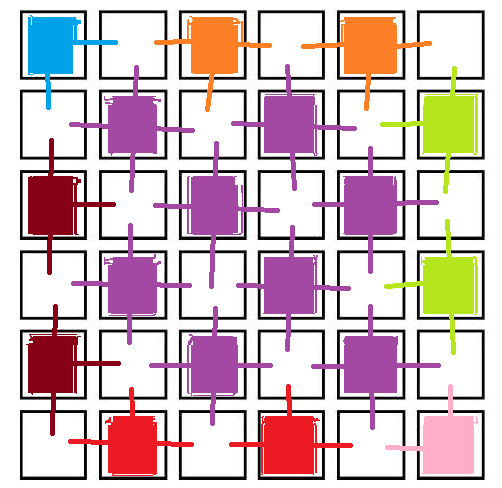

In [12]:
#obrot 0,1,2,3
def obrot(klocek, obrot):
    tmp = klocek.copy()
    for i in range(4):
        krok = i + obrot
        if(krok >= 4):
            krok = krok % 4
        tmp[i] = klocek[krok]
    return tmp

# Przykład 4x4

In [20]:
klocek1 = ['k', 'a', 'b', 'k']
klocek2 = ['k', 'c', 'd', 'a']
klocek3 = ['b', 'a', 'e', 'k']
klocek4 = ['d', 'e', 'a', 'a']
klocek5 = ['k', 'f', 'b', 'c']
klocek6 = ['k', 'k', 'c', 'f']

klocek7 = ['b', 'a', 'a', 'e']
klocek8 = ['c', 'k', 'd', 'a']
klocek9 = ['e', 'b', 'c', 'k']
klocek10 = ['a', 'd', 'c', 'b']
klocek11 = ['a', 'e', 'f', 'd']
klocek12 = ['d', 'k', 'e', 'e']

klocek13 = ['c', 'f', 'k', 'k']
klocek14 = ['c', 'b', 'k', 'f']
klocek15 = ['f', 'a', 'k', 'b']
klocek16 = ['e', 'k', 'k', 'a']

klocki4 = [klocek1, klocek2, klocek3 ,klocek4, 
           klocek5, klocek6, klocek7, klocek8, 
           klocek9, klocek10, klocek11, klocek12, 
           klocek13, klocek14, klocek15, klocek16]

In [9]:
def wypisz4(klocki):
    d = sqrt(len(klocki))
    for i in range(d):
        print('{:^7}'.format(" _ "), '{:^7}'.format(" _ "), '{:^7}'.format(" _ "), '{:^7}'.format(" _ "))
        print('{:^7}'.format(f"| {klocki[d*i][0]} |"), '{:^7}'.format(f"| {klocki[d*i +1][0]} |"), '{:^7}'.format(f"| {klocki[d*i + 2][0]} |"), '{:^7}'.format(f"| {klocki[d*i + 3][0]} |"))
        print('{:^7}'.format(f"|{klocki[d*i][3]} {klocki[d*i][1]}|"), '{:^7}'.format(f"|{klocki[d*i +1][3]} {klocki[d*i + 1][1]}|"), '{:^7}'.format(f"|{klocki[d*i + 2][3]} {klocki[d*i + 2][1]}|"), '{:^7}'.format(f"|{klocki[d*i + 3][3]} {klocki[d*i + 3][1]}|"))
        print('{:^7}'.format(f"| {klocki[d*i][2]} |"), '{:^7}'.format(f"| {klocki[d*i + 1][2]} |"),'{:^7}'.format( f"| {klocki[d*i + 2][2]} |"),'{:^7}'.format( f"| {klocki[d*i + 3][2]} |"))
        print('{:^7}'.format(" _ "), '{:^7}'.format(" _ "), '{:^7}'.format(" _ "), '{:^7}'.format(" _ "))

Implementacja naszego przykładu oraz jego rozwiązanie:

In [10]:
wypisz4(klocki4)

   _       _       _       _   
 | k |   | k |   | b |   | d | 
 |k a|   |a c|   |k a|   |a e| 
 | b |   | d |   | e |   | a | 
   _       _       _       _   
   _       _       _       _   
 | k |   | k |   | b |   | c | 
 |c f|   |f k|   |e a|   |a k| 
 | b |   | c |   | a |   | d | 
   _       _       _       _   
   _       _       _       _   
 | e |   | a |   | a |   | d | 
 |k b|   |b d|   |d e|   |e k| 
 | c |   | c |   | f |   | e | 
   _       _       _       _   
   _       _       _       _   
 | c |   | c |   | f |   | e | 
 |k f|   |f b|   |b a|   |a k| 
 | k |   | k |   | k |   | k | 
   _       _       _       _   


In [15]:
sol = rozwiaz(klocki4)
wypisz4(sol)

--------------------------------------------------------------------------------------

Kolory w nawiasach oznaczają kolory ze schematu wyżej.

Program w obecnej wersji działa tylko dla układanek o parzystej liczbie klocków.

--------------------------------------------------------------------------------------
Warunki podstawowe


Boolean Program (no objective, 1024 variables, 32 constraints)


Dopasowanie koloru krawędzi


Boolean Program (no objective, 1024 variables, 33 constraints)


Porównywanie ścian-środek (kolor fioletowy)


Boolean Program (no objective, 1024 variables, 65 constraints)


Porównywanie ostatnia kolumna (kolor zielony)


Boolean Program (no objective, 1024 variables, 73 constraints)


Porównywanie ostatni rząd (kolor czerwony)


Boolean Program (no objective, 1024 variables, 81 constraints)


Porównywanie pierwsza kolumna (kolor brązowy)


Boolean Program (no objective, 1024 variables, 89 constraints)


Porównywanie pierwszy rząd (kolor pomarańczowy)


Boolean Program (no objective, 1024 variables, 97 constraints)


Góra-lewo (kolor niebieski)


Boolean Program (no objective, 1024 variables, 101 constraints)


Dół-prawo (kolor różowy)


Boolean Program (no objective, 1024 variables, 105 constraints)


--------------------------------------------------------------------------------------
   _       _       _       _   
 | k |   | k |   | k |   | k | 
 |k a|   |a b|   |b f|   |f k| 
 | e |   | f |   | c |   | c | 
   _       _       _       _   
   _       _       _       _   
 | e |   | f |   | c |   | c | 
 |k e|   |e d|   |d b|   |b k| 
 | d |   | a |   | a |   | e | 
   _       _       _       _   
   _       _       _       _   
 | d |   | a |   | a |   | e | 
 |k a|   |a e|   |e a|   |a k| 
 | c |   | b |   | d |   | b | 
   _       _       _       _   
   _       _       _       _   
 | c |   | b |   | d |   | b | 
 |k f|   |f c|   |c a|   |a k| 
 | k |   | k |   | k |   | k | 
   _       _       _       _   


# Docelowe zadanie 6x6

In [17]:
def wypisz6(klocki):
    d = sqrt(len(klocki))
    for i in range(d):
        print('{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "))
        
        print('{:^7}'.format(f"| {klocki[d*i][0]} |"), '{:^7}'.format(f"| {klocki[d*i +1][0]} |"), '{:^7}'.format(f"| {klocki[d*i + 2][0]} |"), '{:^7}'.format(f"| {klocki[d*i +3][0]} |"), '{:^7}'.format(f"| {klocki[d*i +4][0]} |"), '{:^7}'.format(f"| {klocki[d*i +5][0]} |"))
        
        print('{:^7}'.format(f"|{klocki[d*i][3]} {klocki[d*i][1]}|"), '{:^7}'.format(f"|{klocki[d*i +1][3]} {klocki[d*i + 1][1]}|"), '{:^7}'.format(f"|{klocki[d*i + 2][3]} {klocki[d*i + 2][1]} |"), '{:^7}'.format(f"|{klocki[d*i +3][3]} {klocki[d*i +3][1]}|"), '{:^7}'.format(f"|{klocki[d*i +4][3]} {klocki[d*i + 4][1]}|"), '{:^7}'.format(f"|{klocki[d*i + 5][3]} {klocki[d*i + 5][1]} |"))
        
        print('{:^7}'.format(f"| {klocki[d*i][2]} |"), '{:^7}'.format(f"| {klocki[d*i + 1][2]} |"),'{:^7}'.format( f"| {klocki[d*i + 2][2]} |"), '{:^7}'.format(f"| {klocki[d*i +3][2]} |"), '{:^7}'.format(f"| {klocki[d*i + 4][2]} |"),'{:^7}'.format( f"| {klocki[d*i + 5][2]} |"))
        
        print('{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "), '{:^7}'.format(" ___ "))

In [16]:
klocek1 = ['f', 'f', 'y', 'rz']
klocek2 = ['f', 'y', 'f', 'y']
klocek3 = ['k', 'z', 'y', 'p']
klocek4 = ['y', 'f', 'y', 'f']
klocek5 = ['f', 'y', 'y', 'f']
klocek6 = ['y', 'f', 'f', 'y']

klocek7 = ['y', 'z', 'k', 'rn']
klocek8 = ['y', 'y', 'y', 'f']
klocek9 = ['y', 'f', 'rz', 'f']
klocek10 = ['p', 'f', 'rn', 'k']
klocek11 = ['rz', 'f', 'f', 'rz']
klocek12 = ['y', 'g', 'k', 'p']

klocek13 = ['f', 'g', 'k', 'p']
klocek14 = ['rn', 'f', 'rn', 'k']
klocek15 = ['y', 'f', 'f', 'f']
klocek16 = ['z', 'z', 'k', 'k']
klocek17 = ['y', 'f', 'f', 'f']
klocek18 = ['y', 'f', 'f', 'y']

klocek19 = ['y', 'p', 'k', 'g']
klocek20 = ['y', 'y', 'rz', 'f']
klocek21 = ['rn', 'k', 'k', 'z']
klocek22 = ['k', 'rn', 'g', 'k']
klocek23 = ['k', 'k', 'z', 'z']
klocek24 = ['p', 'y', 'p', 'k']

klocek25 = ['y', 'y', 'f', 'y']
klocek26 = ['z', 'y', 'g', 'k']
klocek27 = ['g', 'f', 'p', 'k']
klocek28 = ['k', 'p', 'y', 'rn']
klocek29 = ['y', 'f', 'rz', 'f']
klocek30 = ['f', 'y', 'y', 'rz']

klocek31 = ['g', 'y', 'rn', 'k']
klocek32 = ['rn', 'y', 'g', 'k']
klocek33 = ['rz', 'y', 'y', 'y']
klocek34 = ['g', 'f', 'z', 'k']
klocek35 = ['p', 'k', 'rn', 'f']
klocek36 = ['y', 'z', 'k', 'g']

klocki6 = [klocek1, klocek2, klocek3, klocek4, klocek5, klocek6,
        klocek7, klocek8, klocek9, klocek10, klocek11, klocek12,
        klocek13, klocek14, klocek15, klocek16, klocek17, klocek18, 
        klocek19, klocek20, klocek21, klocek22, klocek23, klocek24,
        klocek25, klocek26, klocek27, klocek28, klocek29, klocek30, 
        klocek31, klocek32, klocek33, klocek34, klocek35, klocek36]


### Legenda

'k' - Zielony Krawędź

'z' - zielony

'rz' - różowy-zółty

'rn' - różowy-niebieski

'f' - fioletowy

'p' - pomaranczowy

'g' - granatowy

'y' - zółty

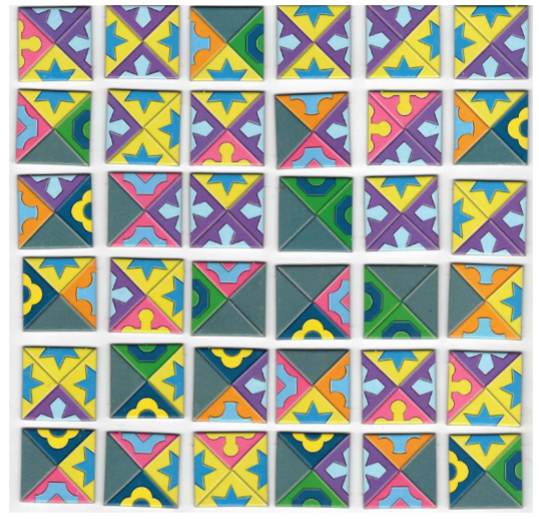

Implementacja naszego zadania oraz jego rozwiązanie:

In [18]:
wypisz6(klocki6)

  ___     ___     ___     ___     ___     ___  
 | f |   | f |   | k |   | y |   | f |   | y | 
|rz f|   |y y|  |p z |   |f f|   |f y|  |y f | 
 | y |   | f |   | y |   | y |   | y |   | f | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | y |   | y |   | y |   | p |  | rz |   | y | 
|rn z|   |f y|  |f f |   |k f|  |rz f|  |p g | 
 | k |   | y |  | rz |  | rn |   | f |   | k | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | f |  | rn |   | y |   | z |   | y |   | y | 
 |p g|   |k f|  |f f |   |k z|   |f f|  |y f | 
 | k |  | rn |   | f |   | k |   | f |   | f | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | y |   | y |  | rn |   | k |   | k |   | p | 
 |g p|   |f y|  |z k |  |k rn|   |z k|  |k y | 
 | k |  | rz |   | k |   | g |   | z |   | p | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___   

In [19]:
sol2 = rozwiaz(klocki6)
wypisz6(sol2)

--------------------------------------------------------------------------------------

Kolory w nawiasach oznaczają kolory ze schematu wyżej.

Program w obecnej wersji działa tylko dla układanek o parzystej liczbie klocków.

--------------------------------------------------------------------------------------
Warunki podstawowe


Boolean Program (no objective, 5184 variables, 72 constraints)


Dopasowanie koloru krawędzi


Boolean Program (no objective, 5184 variables, 73 constraints)


Porównywanie ścian-środek (kolor fioletowy)


Boolean Program (no objective, 5184 variables, 585 constraints)


Porównywanie ostatnia kolumna (kolor zielony)


Boolean Program (no objective, 5184 variables, 617 constraints)


Porównywanie ostatni rząd (kolor czerwony)


Boolean Program (no objective, 5184 variables, 649 constraints)


Porównywanie pierwsza kolumna (kolor brązowy)


Boolean Program (no objective, 5184 variables, 681 constraints)


Porównywanie pierwszy rząd (kolor pomarańczowy)


Boolean Program (no objective, 5184 variables, 713 constraints)


Góra-lewo (kolor niebieski)


Boolean Program (no objective, 5184 variables, 717 constraints)


Dół-prawo (kolor różowy)


Boolean Program (no objective, 5184 variables, 721 constraints)


--------------------------------------------------------------------------------------
  ___     ___     ___     ___     ___     ___  
 | k |   | k |   | k |   | k |   | k |   | k | 
|k rn|  |rn rn| |rn p |  |p g|   |g z|  |z k | 
 | g |   | f |   | f |   | y |   | y |   | z | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | g |   | f |   | f |   | y |   | y |   | z | 
 |k f|   |f y|  |y f |   |f y|   |y y|  |y k | 
 | p |  | rz |   | f |  | rz |   | f |   | g | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | p |  | rz |   | f |  | rz |   | f |   | g | 
 |k f|  |f rz|  |rz y |  |y y|   |y y|  |y k | 
 | g |   | f |   | y |   | y |   | f |  | rn | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | g |   | f |   | y |   | y |   | f |  | rn | 
 |k y|   |y f|  |f f |   |f f|   |f y|  |y k | 
| rn |   | f |  | rz |   | y |   | y |   | p | 


Graficzne odwzorowanie powyższego rozwiązania:

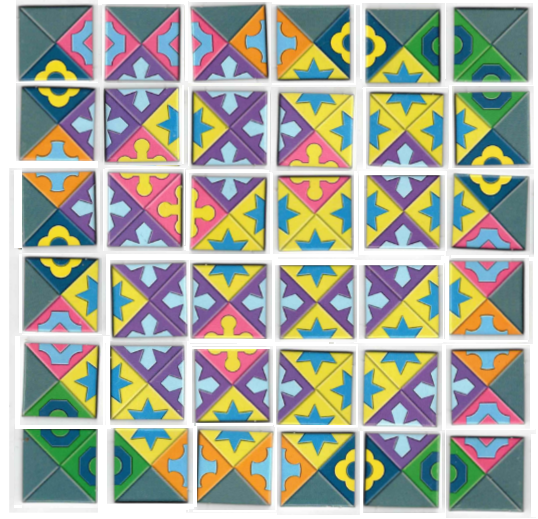

# Rozwiązanie gdyby ktoś nie miał czasu na wywołanie rozwiaz(klocki6)

In [3]:
ostateczny_wynik=[['k', 'rn', 'g', 'k'],
 ['k', 'rn', 'f', 'rn'],
 ['k', 'p', 'f', 'rn'],
 ['k', 'g', 'y', 'p'],
 ['k', 'z', 'y', 'g'],
 ['k', 'k', 'z', 'z'],
 ['g', 'f', 'p', 'k'],
 ['f', 'y', 'rz', 'f'],
 ['f', 'f', 'f', 'y'],
 ['y', 'y', 'rz', 'f'],
 ['y', 'y', 'f', 'y'],
 ['z', 'k', 'g', 'y'],
 ['p', 'f', 'g', 'k'],
 ['rz', 'rz', 'f', 'f'],
 ['f', 'y', 'y', 'rz'],
 ['rz', 'y', 'y', 'y'],
 ['f', 'y', 'f', 'y'],
 ['g', 'k', 'rn', 'y'],
 ['g', 'y', 'rn', 'k'],
 ['f', 'f', 'f', 'y'],
 ['y', 'f', 'rz', 'f'],
 ['y', 'f', 'y', 'f'],
 ['f', 'y', 'y', 'f'],
 ['rn', 'k', 'p', 'y'],
 ['rn', 'y', 'z', 'k'],
 ['f', 'f', 'y', 'y'],
 ['rz', 'f', 'y', 'f'],
 ['y', 'y', 'y', 'f'],
 ['y', 'f', 'f', 'y'],
 ['p', 'k', 'rn', 'f'],
 ['z', 'z', 'k', 'k'],
 ['y', 'p', 'k', 'z'],
 ['y', 'p', 'k', 'p'],
 ['y', 'g', 'k', 'p'],
 ['f', 'z', 'k', 'g'],
 ['rn', 'k', 'k', 'z']]

In [4]:
wypisz6(ostateczny_wynik)

  ___     ___     ___     ___     ___     ___  
 | k |   | k |   | k |   | k |   | k |   | k | 
|k rn|  |rn rn| |rn p |  |p g|   |g z|  |z k | 
 | g |   | f |   | f |   | y |   | y |   | z | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | g |   | f |   | f |   | y |   | y |   | z | 
 |k f|   |f y|  |y f |   |f y|   |y y|  |y k | 
 | p |  | rz |   | f |  | rz |   | f |   | g | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | p |  | rz |   | f |  | rz |   | f |   | g | 
 |k f|  |f rz|  |rz y |  |y y|   |y y|  |y k | 
 | g |   | f |   | y |   | y |   | f |  | rn | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___     ___  
 | g |   | f |   | y |   | y |   | f |  | rn | 
 |k y|   |y f|  |f f |   |f f|   |f y|  |y k | 
| rn |   | f |  | rz |   | y |   | y |   | p | 
  ___     ___     ___     ___     ___     ___  
  ___     ___     ___     ___     ___   